<a href="https://colab.research.google.com/github/Shubhangi2612/CustomerChurn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install six


In [ ]:
!pip install pandas-profiling==2.7.1


In [ ]:
!pip install --upgrade plotly

In [1]:
#import libraries
from google.colab import drive
import pandas as pd
import numpy as np
#Label encoding
from sklearn.preprocessing import LabelEncoder

##Data visualization 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

#scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#data splitting
from sklearn.model_selection import train_test_split

#Accuracy metric
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

#Classificaton algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Data balancing technique 
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
drive.mount('/content/drive')

Mounted at /content/drive




>**Loading csv into dataframe**



In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data-Science-Collection/AIA_Churn_Modelling_Case_Study.csv")

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [16]:
#display shape of data
df.shape

(7043, 21)

In [17]:
#display datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
#display basic statistics
df.describe(include=np.object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5141-ZUVBH,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [3]:
#checking the count value for each column
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())



customerID
7795-CFOCW    1
8169-SAEJD    1
3891-PUQOD    1
7044-YAACC    1
4195-PNGZS    1
             ..
8992-VONJD    1
6549-YMFAW    1
9169-BSVIN    1
6331-LWDTQ    1
3308-MHOOC    1
Name: customerID, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3

In [20]:
#checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> **There is no null or missing value in dataset**

In [21]:
#checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

>  **No duplicate values**

In [22]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

> **While checking datatype for 'TotalCharges' it is showing its an object but this column is in numeric format in dataset so i checked for blank spaces.**

In [23]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'].count()

11

> **After checking count for blank spaces, it is showing that 11 blank rows in 'TotalCharges' column, so i converted the object datatype into numeric and also fill blank space with 0.**

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ',''))

In [5]:
df.TotalCharges = df[['TotalCharges']].fillna(0)

In [26]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

> **Checking for value count in 'churn' variable, is data imbalanced?**

In [27]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

No handles with labels found to put in legend.


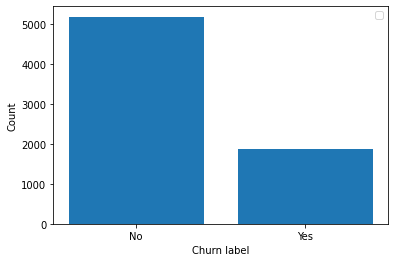

In [6]:
# Visualization of Output data
plt.bar(x = df['Churn'].unique(), height = df.Churn.value_counts())
plt.legend()
plt.xlabel("Churn label")
plt.ylabel("Count")
plt.show()

> **Conclusion : Plot showing that non churner data is more than churner data. Data is imbalanced.**



---



> **Need to explore data to find some data pattern 
 for categorical data, seaborn count plot is used against churn variable**.

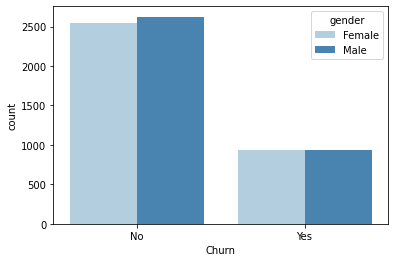

In [29]:
sns.countplot(x='Churn',data=df,hue='gender',palette="Blues")


> **In this plot is showing that gender is not contributing factor in customer churn dataset, both have churn or haven't churn at the same time there is no major difference.**



---



> **see how gender, partner and dependent impact on churn**

In [30]:
##using groupby its better to see the count result
df.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='Count')

,gender,Partner,Dependents,Churn,Count
0,Female,No,No,No,1068
1,Female,No,No,Yes,587
2,Female,No,Yes,No,112
3,Female,No,Yes,Yes,33
4,Female,Yes,No,No,618
5,Female,Yes,No,Yes,187
6,Female,Yes,Yes,No,751
7,Female,Yes,Yes,Yes,132
8,Male,No,No,No,1089
9,Male,No,No,Yes,536


In [7]:
##visualizing above results and above features are categorical
fig = px.treemap(df.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='Count'), 
                 path=['gender', 'Partner', 'Dependents', 'Churn'], values='Count', color='Churn', range_color = [78878,4434],
                 title='How gender, partner and dependents are related to churn')

fig.show()

> **whether male or female, if they do not have partner or dependent they more likely to be churn.**



---



> **Insight on phone service and internet service column**

In [8]:
df.groupby(['Churn', 'PhoneService', 'InternetService']).size().reset_index(name='count')

,Churn,PhoneService,InternetService,count
0,No,No,DSL,512
1,No,Yes,DSL,1450
2,No,Yes,Fiber optic,1799
3,No,Yes,No,1413
4,Yes,No,DSL,170
5,Yes,Yes,DSL,289
6,Yes,Yes,Fiber optic,1297
7,Yes,Yes,No,113


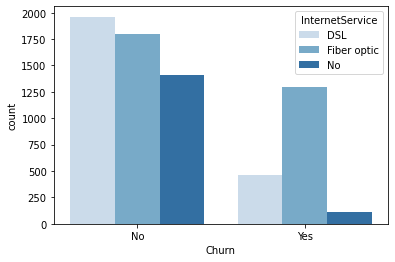

In [9]:
sns.countplot(x='Churn',data=df,hue='InternetService',palette="Blues")

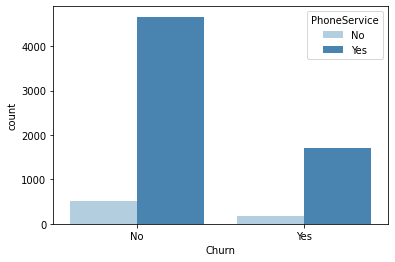

In [10]:
sns.countplot(x='Churn',data=df,hue='PhoneService',palette="Blues")

>**In both graphs, fiber optic and phone service churn more.**

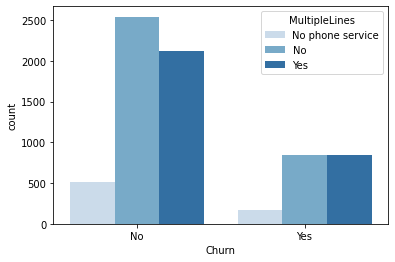

In [11]:
sns.countplot(x='Churn',data=df, hue='MultipleLines',palette='Blues')


>**In above plot multiple lines service has lower churn rate.**

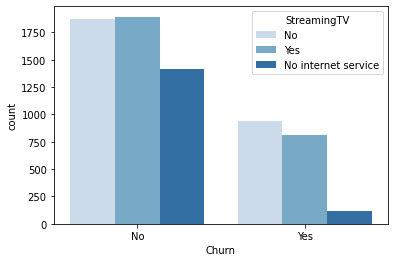

In [12]:
sns.countplot(x='Churn',data=df, hue='StreamingTV',palette='Blues')


>**In above plot, for streamingtv services also has lower churn rate.**

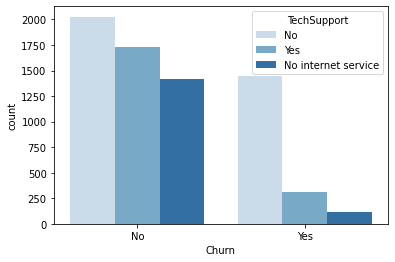

In [13]:
sns.countplot(x='Churn',data=df,hue='TechSupport',palette="Blues")

>**customer with techsupport-No are more churn.** 

In [14]:
df.groupby(['Churn', 'StreamingMovies']).size().reset_index(name='count')

,Churn,StreamingMovies,count
0,No,No,1847
1,No,No internet service,1413
2,No,Yes,1914
3,Yes,No,938
4,Yes,No internet service,113
5,Yes,Yes,818


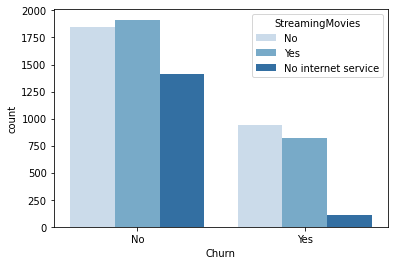

In [15]:
sns.countplot(x='Churn',data=df,hue='StreamingMovies',palette="Blues")

>**In above plot for StreamingMovies churn rate is low.** 



---



>**Data visualization for Numeric data**

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Tenure in Months')]

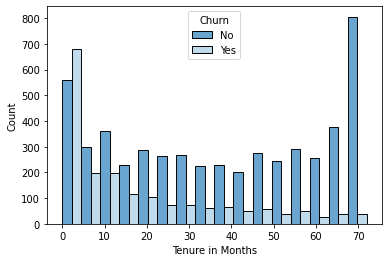

In [16]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge',palette='Blues_r')
ax.set(xlabel="Tenure in Months", ylabel = "Count")


>**In above plot it shows churn amount in first 5 to 6 months is higher, it is the initial time when customer try out the service and decide whether continue or cancel.**



---



>**Data analysis profile creation using Panadas Profile report---**

In [ ]:
 # generating the profile report by passing the dataframe object to the profiling function
profile = ProfileReport(df)
profile
# profile.to_file("Analysis.html)
 profile.to_file("/content/drive/MyDrive/Data-Science-Collection/churn_analysis_report.html")



---



>**Encoding categorical variable---**

In [17]:
#Encoding the categorical variables using label encoder
def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:

        labelencoder_X = LabelEncoder()
        dataframe[i] = labelencoder_X.fit_transform(dataframe[i])


columnlist = ['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
MultiLabelEncoder(columnlist,df)

>**Chcecking datatype after encoding except 'churn' column**

In [18]:
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

 >**successfully encoded object datatype into integer using label encoder.**

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


>**Correlation among all variables.**

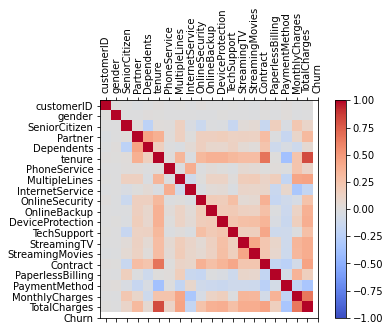

In [20]:
#Correlation visualization among all variables
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

>**Feature selection
Using correlation matrix**

(20.5, -0.5)

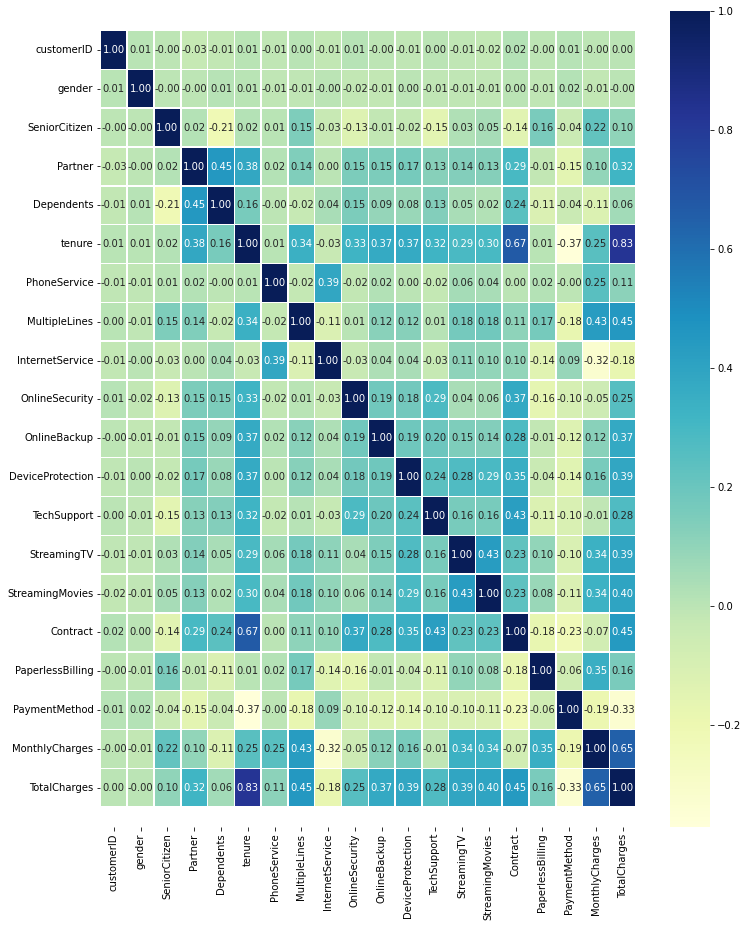

In [21]:
#correlation matrix visualization
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(12, 15)) 

ax = sns.heatmap(corrmat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

>**In above correlation matrix TotalCharges, MonthlyCharges and Tenure showing very strong relationship**

In [22]:
corr_check = df[['MonthlyCharges', 'TotalCharges', 'tenure']].copy()

In [23]:
corr_check.corr(method='pearson')


,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651174,0.247900
TotalCharges,0.651174,1.000000,0.826178
tenure,0.247900,0.826178,1.000000


>**After observing correlation matrix, dropping unnecessary columns--**

In [24]:
df = df.drop(columns=['customerID','SeniorCitizen','gender','PaperlessBilling','PaymentMethod'])      


>**After observing correlation matrix, i concluded that above five columns are less necessary so decided to drop it from dataframe.**

In [25]:
df.columns

Index(['Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
df['Churn'].value_counts()     ### 0 -> No churn(No)
                              #### 1 -> churn(Yes)

No     5174
Yes    1869
Name: Churn, dtype: int64

>**Dataset splitting into training and testing set**

In [27]:
y = df.Churn
X = df.drop('Churn',axis=1)

In [ ]:
X.head()

>**Features Scaling**

In [28]:
cols = X.columns # keeping the names of all columns
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X_encoded_scaled = pd.DataFrame(x_scaled, columns=cols)

In [29]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

>**Converting 'y' variable into numpy array.**

In [30]:
print("Before encoding: ", y.unique())

y = np.where(y.str.contains("Yes"), 1, 0)

print("After encoding: ", y) # Now y is a numpy array

Before encoding:  ['No' 'Yes']
After encoding:  [0 0 1 ... 0 1 0]


>**Data splitting into training and testing dataset**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

> **Model Building -**
> 
> 1.   Logistic Regression
> 2.   Random Forest
> 3.   Gradient Boosting classifier 
> 4.   Support Vector Machine
> 5.   Decision Tree
> 6.   K-NearestNeighbour
> 7.   Naive Bayes
> 
> **Firstly, model building with imbalanced data.**

In [32]:
#Logistic regression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

0.7892122072391767


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [33]:
#Random Forest 
##Model using random forest ensemble classifer 

rfc = RandomForestClassifier()
#fit the predictor and target
rfc.fit(X_train, y_train)
# predict

rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))
# print classification report 
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions)) 

ROCAUC score: 0.679846196268268
Accuracy score: 0.7714691270404542
F1 score: 0.5319767441860466
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1028
           1       0.60      0.48      0.53       381

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



**In Random Forest Classifier, Accuracy is good but other metrics like f1 score, precison and recall are not good. its because data is imbalanced, model is not giving good results.**

In [34]:
##Gradient Boosting classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

0.7920511000709723


**Conclusion Of all three algorithm: Logistic regression, Random Forest and XGboost algorithm shows almost same accuracy which is 79%  but need to improve further for better accuracy.**   

In [35]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [36]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
# print classification report 
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions)) 

ROCAUC score: 0.6724674979829856
Accuracy score: 0.7799858055358411
F1 score: 0.5186335403726708
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1028
           1       0.63      0.44      0.52       381

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



>**Support vector machine algorithm also giving 78% accuracy**

>**4 algorithms with imbalanced data. baseline models are done 
Now need to balance the data.**

>**Data balancing**
1. SMOTE technique: use SMOTE to oversample the minority class to balance the class distribution.

In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 1488
Before OverSampling, counts of label '0': 4146 

After OverSampling, the shape of train_x: (8292, 15)
After OverSampling, the shape of train_y: (8292,) 

After OverSampling, counts of label '1': 4146
After OverSampling, counts of label '0': 4146


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



>**model test after data balancing using logistic regression**

In [38]:
#prediction and recall
lr1 = LogisticRegression() 
lr1.fit(x_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1028
           1       0.51      0.80      0.62       381

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



>**After data balancing with SMOTE upsampling technique, Logistic Regression accuracy decreased.** 



---



>**Model Evaluation**
1. Grid search 
2. Randomized search 

In [39]:
#Finding out optimum k-value using elbow method

def find_k_KNN(x_train, x_test, y_train, y_test):
    error_rate = []

    # calculating error rate
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(x_test)
        error_rate.append(np.mean(pred_i != y_test))


    # Plotting elbow graph
    plt.figure(figsize=(10,6))
    plt.plot(range(1,40), error_rate, color="Blue", linestyle="dashed", marker="o",
             markerfacecolor="red", markersize=10)
    plt.title("Error Rate vs. K Value")
    plt.xticks(range(1,40))
    plt.xlabel("K")
    plt.ylabel("Error Rate")

In [40]:

def train_models(X_train, y_train, k_values):
    # defining models
    models = [LogisticRegression(penalty = 'l2'), RandomForestClassifier(), 
              XGBClassifier(use_label_encoder=False, verbosity = 0, eval_metric='logloss', tree_method = 'gpu_hist', 
                            predictor = 'gpu_predictor'),
              KNeighborsClassifier(), tree.DecisionTreeClassifier(), GaussianNB(), svm.SVC()]

   # defining model names
    model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting Classifier', 'KNN', 'Decision Tree', 
                   'Naive Bayes', 'Support Vector Machines']

    # defining parameters

    parameters = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, # logistic regression

                 {'n_estimators':[100, 300, 500, 600, 700, 1000], 'criterion':['gini', 'entropy'], 
                  'max_depth' : [10, 20, 25, 30, 35, 40], 'min_samples_split': [100, 200, 50, 25]}, # random forest classifier

                 {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] , "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
                  "min_child_weight" : [ 1, 3, 5, 7 ], "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
                  "n_estimators": [100, 120, 135, 150, 165, 200]}, # xgb classifier

                 {'n_neighbors' : k_values}, # kNN

                {'criterion':['gini', 'entropy'], 'max_depth' : [10, 20, 25, 30, 35, 40], 'min_samples_split': [100, 200, 50, 25]}, # decision tree

                {}, # naive bayes

                {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} # svm
                 ]
    
    
    # training the models

    for model_idx in range(len(models)):
        
        
        if model_names[model_idx] in ['Logistic Regression', 'KNN', 'Naive Bayes', 'Support Vector Machines']:
            classifier = GridSearchCV(estimator = models[model_idx], param_grid = parameters[model_idx], n_jobs=-1)
        else:
            classifier = RandomizedSearchCV(estimator = models[model_idx], param_distributions = parameters[model_idx], random_state=0, n_jobs=-1)

        classifier.fit(X_train, y_train)

        print(model_names[model_idx])
        print(classifier.best_estimator_)
        models[model_idx] = classifier.best_estimator_ # updating the model with best hyperparameters as per training data
        
        print(f'Best train score: { classifier.best_score_}')
        print(classifier.best_params_)
        print("\n******************************************************************************************************************\n")
    
    return (models, model_names)


In [41]:
def test_models(X_train, X_test, y_train, y_test, models, model_names):
    for classifier_idx in range(len(models)):
        models[classifier_idx].fit(X_train, y_train)
        y_pred = models[classifier_idx].predict(X_test)
        
        print(model_names[classifier_idx])
        print(f'{models[classifier_idx].score(X_test, y_test)*100}')
        print("\n####################")
        print(classification_report(y_test, y_pred))
        print("\n\n******************************************************************************************************************\n\n")

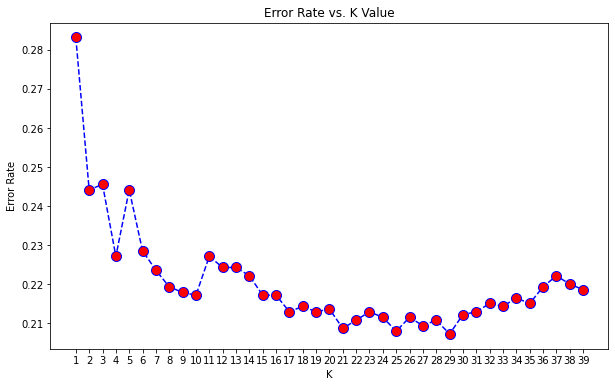

In [42]:
find_k_KNN(X_train, X_test, y_train, y_test) # decide using the pictorial graph

In [43]:
k_values = [2, 4, 6]

# for training the models to find the best estimators based on training score
models, model_names = train_models(X_train, y_train, k_values)

Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Best train score: 0.8022717064275706
{'solver': 'newton-cg'}

******************************************************************************************************************

Random Forest
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, 

In [44]:
# for testing the models to find the best test score using the best estimated parameters for each algorithm
test_models(X_train, X_test, y_train, y_test, models, model_names)

Logistic Regression
78.49538679914833

####################
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1028
           1       0.62      0.52      0.57       381

    accuracy                           0.78      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409



******************************************************************************************************************


Random Forest
78.85024840312278

####################
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1028
           1       0.65      0.48      0.55       381

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



***************************************************************************************************************

> **In all seven algorithm, after doing Grid search and random search cross validation,  accuracy slightly improve but not as expected.
so to improve accuracy data balancing need to be done.
Previously i have done with SMOTE technique but it wasn't helpful to improve accuracy of model.**



---



>**SMOTE ENN technique(UpSampling + Edited NearestNeighbour )**

In [45]:
sm = SMOTEENN(random_state = 42) 
# Sampling_strategy is left 'auto' which is equivalent to 'not majority', i.e., multiple copies of minority class will be generated to match the number of samples in majority class
# Then ENN  will be used to remove the misclassified majority samples
X_resample, y_resample = sm.fit_resample(X, y) # resampling using SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [46]:
X.shape

(7043, 15)

In [47]:
X_resample.shape   ### we can see first upsampling using SMOTE was done on minority class and then down sampling on majority class using ENN

(5872, 15)

In [48]:
y.shape

(7043,)

In [49]:
X_resample

array([[0.00000000e+00, 0.00000000e+00, 4.50000000e+01, ...,
        1.00000000e+00, 4.23000000e+01, 1.84075000e+03],
       [0.00000000e+00, 1.00000000e+00, 6.20000000e+01, ...,
        1.00000000e+00, 5.61500000e+01, 3.48795000e+03],
       [0.00000000e+00, 0.00000000e+00, 2.50000000e+01, ...,
        0.00000000e+00, 1.05500000e+02, 2.68605000e+03],
       ...,
       [1.05992802e-01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.54023032e+01, 9.54023032e+01],
       [0.00000000e+00, 0.00000000e+00, 4.00000000e+00, ...,
        0.00000000e+00, 7.83357238e+01, 3.17683405e+02],
       [0.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 4.38713040e+01, 1.27949431e+02]])

In [50]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5174, 1869]))

In [51]:
np.unique(y_resample, return_counts=True)

(array([0, 1]), array([2693, 3179]))

> **Scaling**

In [52]:
X_resample = pd.DataFrame(X_resample)

In [53]:
cols = X_resample.columns # keeping the names of all columns
X_resample = X_resample.to_numpy()
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_resample)
X_resample_scaled = pd.DataFrame(x_scaled, columns=cols)

In [54]:
# Train - test split
# again spliting train and test data

xr_train, xr_test, yr_train, yr_test = train_test_split(X_resample_scaled, y_resample, test_size=0.2)



In [55]:
X_resample_scaled.shape


(5872, 15)

In [56]:
y_resample.shape

(5872,)

In [58]:
#Finding out optimum k-value using elbow method

def find_k_KNN(xr_train, xr_test, yr_train, yr_test):
    error_rate = []

    # calculating error rate
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(xr_train, yr_train)
        pred_i = knn.predict(xr_test)
        error_rate.append(np.mean(pred_i != yr_test))


    # Plotting elbow graph
    plt.figure(figsize=(10,6))
    plt.plot(range(1,40), error_rate, color="Blue", linestyle="dashed", marker="o",
             markerfacecolor="red", markersize=10)
    plt.title("Error Rate vs. K Value")
    plt.xticks(range(1,40))
    plt.xlabel("K")
    plt.ylabel("Error Rate")

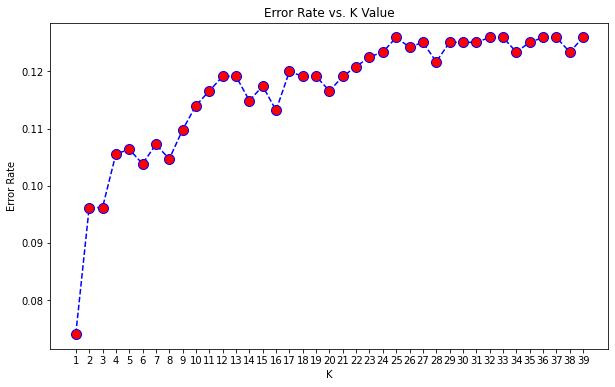

In [59]:
find_k_KNN(xr_train, xr_test, yr_train, yr_test) # decide using the pictorial graph

In [60]:
k_values = [1]

# for training the models to find the best estimators based on training score
models, model_names = train_models(xr_train, yr_train, k_values)

Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Best train score: 0.905683955316883
{'solver': 'newton-cg'}

******************************************************************************************************************

Random Forest
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, o

In [61]:
# for testing the models to find the best test score using the best estimated parameters for each algorithm
test_models(xr_train, xr_test, yr_train, yr_test, models, model_names)

Logistic Regression
90.55319148936171

####################
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       563
           1       0.90      0.92      0.91       612

    accuracy                           0.91      1175
   macro avg       0.91      0.90      0.91      1175
weighted avg       0.91      0.91      0.91      1175



******************************************************************************************************************


Random Forest
95.06382978723404

####################
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       563
           1       0.95      0.96      0.95       612

    accuracy                           0.95      1175
   macro avg       0.95      0.95      0.95      1175
weighted avg       0.95      0.95      0.95      1175



***************************************************************************************************************

>**Best model among all models, finalized model**

In [62]:
# choosing the final model depending on best test scores

classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=np.nan, 
              n_estimators=165, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity = 0, eval_metric='logloss')

classifier.fit(xr_train, yr_train)
yr_pred = classifier.predict(xr_test)



In [63]:
print(classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       563
           1       0.95      0.97      0.96       612

    accuracy                           0.96      1175
   macro avg       0.96      0.96      0.96      1175
weighted avg       0.96      0.96      0.96      1175



**XG boost is giving best model accuracy after applying data balancing with SMOTEENN method accuracy improved effectively.**